## Análise de Cluster

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Leitura dos dados

In [2]:
complete_data_with_totalnet = pd.read_csv("data/integrated_processed_enem_anatel_ibge_2019.csv", encoding="latin_1")
complete_data_with_totalnet["densidade_total_internet_fixa"] = complete_data_with_totalnet[['fibra_optica', 'wifi', 'ethernet', 'lte',
                                                        'vsatelite', 'wimax', 'plc_eletrico', 'xdsl', 
                                                        'cable_modem', 'fwa_5g_fixed', 'atm_backbone',
                                                        'dth_satelite', 'hfc_tv_cabo', 'fr_frame_relay',
                                                        'mmds']].sum(axis=1)
complete_data_with_totalnet.sort_values(by="cod_municipio_ibge", inplace= True)
complete_data_with_totalnet = complete_data_with_totalnet[['cod_municipio_ibge', 'NO_MUNICIPIO_RESIDENCIA',
                                                          'UF', 'fibra_optica', 'wifi', 'ethernet', 'lte',
                                                          'vsatelite', 'wimax', 'plc_eletrico', 'xdsl', 
                                                          'cable_modem', 'fwa_5g_fixed', 'atm_backbone',
                                                          'dth_satelite', 'hfc_tv_cabo', 'fr_frame_relay',
                                                          'mmds', 'densidade_total_internet_fixa', 
                                                          'remuneracao_media', 'gini', 'pib', 
                                                          'pib_p_capta', 'media_idhm', 
                                                          'mean_grades_group_cities']]
complete_data_with_totalnet

,cod_municipio_ibge,NO_MUNICIPIO_RESIDENCIA,UF,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,xdsl,cable_modem,fwa_5g_fixed,atm_backbone,dth_satelite,hfc_tv_cabo,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
3852,1100015,Alta Floresta D'Oeste,RO,0,0,3,0,0,0,0,239,0,0,0,0,0,2,0,244,2030.28,0.472,4.956288e+08,21600.73,0.644038,493.009774
3853,1100023,Ariquemes,RO,0,0,47,0,0,0,0,0,0,8,0,0,0,3,0,58,2030.28,0.472,2.578830e+09,23908.38,0.644038,491.642412
3854,1100031,Cabixi,RO,3,129,2,0,3,0,0,75,0,0,0,0,0,0,0,212,2030.28,0.472,1.399594e+08,26347.78,0.644038,479.756641
3855,1100049,Cacoal,RO,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,6,2030.28,0.472,2.260644e+09,26483.95,0.644038,497.176007
3856,1100056,Cerejeiras,RO,0,0,0,0,0,0,0,644,0,0,0,0,0,4,0,648,2030.28,0.472,5.068545e+08,31051.55,0.644038,493.380822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,5222005,Vianópolis,GO,0,0,0,0,74,0,0,606,0,0,0,0,0,0,0,680,2019.95,0.460,4.836633e+08,34888.79,0.694984,500.626357
1125,5222054,Vicentinópolis,GO,0,0,0,0,0,0,0,120,0,0,0,0,0,2,0,122,2019.95,0.460,3.423556e+08,39157.68,0.694984,477.479032
1126,5222203,Vila Boa,GO,83,142,0,0,0,0,0,0,0,0,0,0,0,1,0,226,2019.95,0.460,1.136685e+08,18419.78,0.694984,456.444022
1127,5222302,Vila Propício,GO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019.95,0.460,2.069712e+08,35555.96,0.694984,468.682727


#### Tipo e Classe das variáveis no DataFrame

In [3]:
complete_data_with_totalnet.dtypes

cod_municipio_ibge                 int64
NO_MUNICIPIO_RESIDENCIA           object
UF                                object
fibra_optica                       int64
wifi                               int64
ethernet                           int64
lte                                int64
vsatelite                          int64
wimax                              int64
plc_eletrico                       int64
xdsl                               int64
cable_modem                        int64
fwa_5g_fixed                       int64
atm_backbone                       int64
dth_satelite                       int64
hfc_tv_cabo                        int64
fr_frame_relay                     int64
mmds                               int64
densidade_total_internet_fixa      int64
remuneracao_media                float64
gini                             float64
pib                              float64
pib_p_capta                      float64
media_idhm                       float64
mean_grades_grou

#### Reescala dos Dados numéricos para um mesmo range de valores 

In [4]:
scaler = StandardScaler()
complete_num_data_totalnet_reescale = pd.DataFrame( 
    scaler.fit_transform(complete_data_with_totalnet[['fibra_optica', 'wifi', 'ethernet', 'lte',
                                                          'vsatelite', 'wimax', 'plc_eletrico', 'xdsl', 
                                                          'cable_modem', 'fwa_5g_fixed', 'atm_backbone',
                                                          'dth_satelite', 'hfc_tv_cabo', 'fr_frame_relay',
                                                          'mmds', 'densidade_total_internet_fixa', 
                                                          'remuneracao_media', 'gini', 'pib', 
                                                          'pib_p_capta', 'media_idhm', 
                                                          'mean_grades_group_cities']]), 
    columns= [['fibra_optica', 'wifi', 'ethernet', 'lte',
                                                          'vsatelite', 'wimax', 'plc_eletrico', 'xdsl', 
                                                          'cable_modem', 'fwa_5g_fixed', 'atm_backbone',
                                                          'dth_satelite', 'hfc_tv_cabo', 'fr_frame_relay',
                                                          'mmds', 'densidade_total_internet_fixa', 
                                                          'remuneracao_media', 'gini', 'pib', 
                                                          'pib_p_capta', 'media_idhm', 
                                                          'mean_grades_group_cities']])

In [5]:
complete_num_data_totalnet_reescale

,fibra_optica,wifi,ethernet,lte,vsatelite,wimax,plc_eletrico,xdsl,cable_modem,fwa_5g_fixed,atm_backbone,dth_satelite,hfc_tv_cabo,fr_frame_relay,mmds,densidade_total_internet_fixa,remuneracao_media,gini,pib,pib_p_capta,media_idhm,mean_grades_group_cities
0,-0.150029,-0.178603,-0.107670,-0.071094,-0.174792,-0.055943,-0.019937,-0.076055,-0.049345,-0.120171,-0.040100,-0.024269,-0.087622,0.486751,-0.030665,-0.108802,0.090507,-0.956937,-0.065454,-0.115307,-0.257790,0.032636
1,-0.150029,-0.178603,0.247559,-0.071094,-0.174792,-0.055943,-0.019937,-0.214402,-0.049345,-0.011916,-0.040100,-0.024269,-0.087622,0.805453,-0.030665,-0.126726,0.090507,-0.956937,0.098637,-0.024987,-0.257790,-0.022732
2,-0.124701,0.716479,-0.115744,-0.071094,0.090011,-0.055943,-0.019937,-0.170988,-0.049345,-0.120171,-0.040100,-0.024269,-0.087622,-0.150654,-0.030665,-0.111885,0.090507,-0.956937,-0.093470,0.070488,-0.257790,-0.504014
3,-0.150029,-0.178603,-0.131890,-0.071094,-0.174792,-0.055943,-0.019937,-0.214402,-0.049345,-0.120171,-0.040100,-0.024269,-0.087622,1.761561,-0.030665,-0.131737,0.090507,-0.956937,0.073574,0.075818,-0.257790,0.201337
4,-0.150029,-0.178603,-0.131890,-0.071094,-0.174792,-0.055943,-0.019937,0.158382,-0.049345,-0.120171,-0.040100,-0.024269,-0.087622,1.124156,-0.030665,-0.069870,0.090507,-0.956937,-0.064570,0.254589,-0.257790,0.047661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,-0.150029,-0.178603,-0.131890,-0.071094,6.357011,-0.055943,-0.019937,0.136385,-0.049345,-0.120171,-0.040100,-0.024269,-0.087622,-0.150654,-0.030665,-0.066787,0.069930,-1.250585,-0.066397,0.404775,0.609402,0.341049
5566,-0.150029,-0.178603,-0.131890,-0.071094,-0.174792,-0.055943,-0.019937,-0.144939,-0.049345,-0.120171,-0.040100,-0.024269,-0.087622,0.486751,-0.030665,-0.120558,0.069930,-1.250585,-0.077527,0.571856,0.609402,-0.596240
5567,0.550726,0.806681,-0.131890,-0.071094,-0.174792,-0.055943,-0.019937,-0.214402,-0.049345,-0.120171,-0.040100,-0.024269,-0.087622,0.168048,-0.030665,-0.110536,0.069930,-1.250585,-0.095541,-0.239806,0.609402,-1.447997
5568,-0.150029,-0.178603,-0.131890,-0.071094,-0.174792,-0.055943,-0.019937,-0.214402,-0.049345,-0.120171,-0.040100,-0.024269,-0.087622,-0.150654,-0.030665,-0.132315,0.069930,-1.250585,-0.088191,0.430888,0.609402,-0.952423


### Clusterização com Kmeans

In [43]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#### Aplicando a redução de componentes com a Técnica de Análise de Componente Principal - [PCA]

In [60]:
pca = PCA(n_components= 1)
data_pca = pca.fit_transform(complete_num_data_totalnet_reescale[['densidade_total_internet_fixa', 
                                                                  'remuneracao_media', 'gini', 'pib', 
                                                                  'pib_p_capta', 'media_idhm']])
data_pca = pd.DataFrame(data_pca, columns=["component_1"]).join(
    complete_num_data_totalnet_reescale['mean_grades_group_cities']).round(3)
data_pca.columns = ["component_1", "grades"]
data_pca

/home/mcolazin/anaconda3/envs/tcc_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,component_1,grades
0,0.287,0.033
1,0.331,-0.023
2,0.348,-0.504
3,0.363,0.201
4,0.418,0.048
...,...,...
5565,1.094,0.341
5566,1.144,-0.596
5567,0.866,-1.448
5568,1.094,-0.952


#### calculando o silluete Score para diversos K clusters

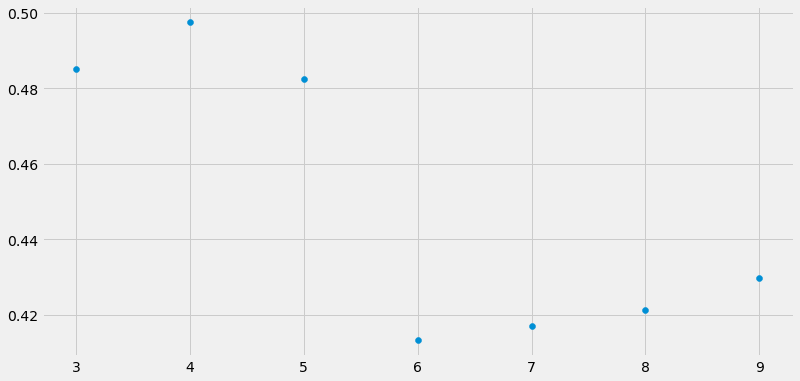

In [75]:
score = []
for k in range(3,10):
    cluster_model = KMeans(n_clusters=k)
    cluster_model.fit(data_pca)
    score.append(silhouette_score(data_pca, cluster_model.labels_))
plt.figure(figsize=(12,6))
plt.scatter(x = range(3,10), y = score)
plt.show()

Para o valor de K = 4 Clusters o Score Silhouette apresentou o valor de maior proximidade a 1. Assim o valor escolhido será k = 4 clusters (indicação da melhor separação dos controides para este modelo

#### Definindo o modelo para k = 4 clusters

In [73]:
kmeans_model = KMeans(n_clusters= 4)
kmeans_model.fit(data_pca)

KMeans(n_clusters=4)

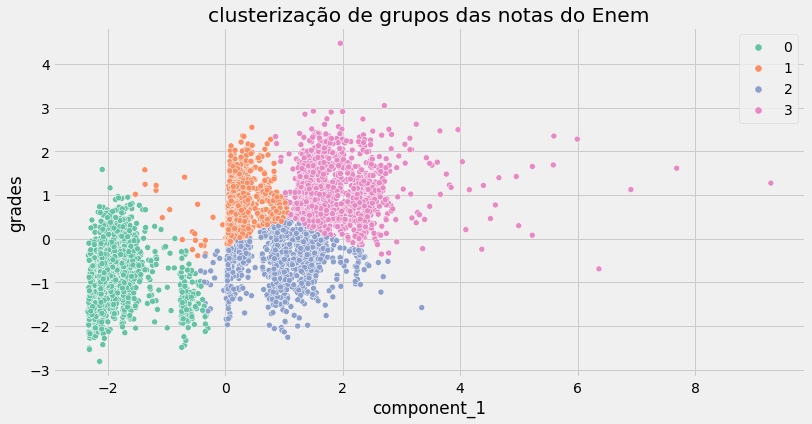

In [79]:
plt.style.use("fivethirtyeight")
plt.figure(figsize= (12, 6))
sns.scatterplot(data= data_pca, x= "component_1", y= "grades", 
                hue= kmeans_model.labels_, palette= "Set2")
plt.title("clusterização de grupos das notas do Enem")
plt.show()

## END